# Determinants, Eigenvalues and Eigenvectors

In this tutorial, we will cover determinants, eigenvalues and eigenvectors. First, we will cover them briefly so that we get familiar with the code and will learn how to read the output. After that, we will cover three important examples related to orthogonal projections, reflections and network graphs. We will briefly cover each one for the sake of brevity. However, applications are endless and I encourage you to explore them further in your studies, if applicable.

Some documentation links are as follows:

Determinant: https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.det.html#scipy.linalg.det

Eigenvalues, eigenvectors: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html#numpy.linalg.eig

Networkx: https://networkx.github.io/documentation/latest/index.html

Networkx tutorial: https://networkx.github.io/documentation/latest/tutorial.html


In [1]:
import numpy as np
import scipy.linalg as la

## Determinants

We can compute determinant of a matrix $A$ by using using la.det(A).

In [2]:
A=np.array([[1,2],[2,5]])

la.det(A)

1.0

## Eigenvalues and Eigenvectors

Let $A$ be an $n\times n$ matrix. A nonzero vector ${\mathbf v}$ in ${\mathbb R}^n$ is called an eigenvector of $A$ if $A{\mathbf v}$ is a scalar multiple of ${\mathbf v}$. That means, there exists a number $\lambda$ such that
$$A{\mathbf v}=\lambda{\mathbf v}.$$

This is the eigenvalue-eigenvector equation.

To compute eigenvalues of a matrix $A$ in Python, we use la.eigvals(A). If we also want to compute eigenvectors, we use la.eig(A) which will give a tuple as an output. The first array in that tuple is an array containing eigenvalues while in the second array we have eigenvectors corresponding to these eigenvalues. Output of eigenvalues is in the form $a+bj$ where $a$ is the real part and $bj$ is the complex part with $j$ such that $j^2=-1$. Note that in this output, eigenvectors are normalized. 

In [3]:
A=np.array([[2,-1],[0,4]])

la.eigvals(A)

array([2.+0.j, 4.+0.j])

This shows that matrix $A$ has two eigenvalues, $\lambda_1=2$ and $\lambda_2=4$. Let's find eigenvectors.

In [4]:
la.eig(A)

(array([2.+0.j, 4.+0.j]), array([[ 1.        , -0.4472136 ],
        [ 0.        ,  0.89442719]]))

Note that the second array in the tuple gives us the matrix $S=[v_1,v_2]$ where $v_1$ and $v_2$ are the eigenvectors of the matrix $A$.

To obtain eigenvectors, we first have to transpose the second array in this tuple. 

In [5]:
second=la.eig(A)[1]

print('Second array is {}'.format(second))

ev_1=np.transpose(second)[0]

ev_2=np.transpose(second)[1]

print('First eigenvector is {}'.format(ev_1))
print('Second eigenvector is {}'.format(ev_2))

Second array is [[ 1.         -0.4472136 ]
 [ 0.          0.89442719]]
First eigenvector is [1. 0.]
Second eigenvector is [-0.4472136   0.89442719]


In [6]:
first=la.eig(A)[0]
second=la.eig(A)[1]

l_1=first[0]
l_2=first[1]
ev_1=np.transpose(second)[0]
ev_2=np.transpose(second)[1]

print(np.dot(A,ev_1)==l_1*ev_1)
print(np.dot(A,ev_2)==l_2*ev_2)

[ True  True]
[ True  True]


#### Note: 

Eigenvalues are $\lambda_1=2$ and $\lambda_2=4$. Eigenvectors are ${\mathbf v}_1=\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and ${\mathbf v}_2=\begin{bmatrix} -0.4472136 \\ 0.89442719 \end{bmatrix}$, respectively.

If we do this manually, we get ${\mathbf v}_2=\begin{bmatrix} -1\\2\end{bmatrix}$ for $\lambda_1=4$. However, nothing is wrong here. Notice that Python gave us normalized or multiple versions of eigenvectors. This is all ok since any multiple of an eigenvector is in the same eigenspace corresponding to that eigenvalue, so it is also an eigenvector.


### Function for eigenvalues and eigenvectors:

Now, let's write a function that gives us eigenvalue-eigenvector pairs as a list.

In [7]:
def eigenpairs(A):
    lst=[]
    size=len(A)
    first=la.eig(A)[0]
    second=la.eig(A)[1]
    for i in range(0,size):
        eigenvalue=first[i]
        eigenvector=np.transpose(second)[i]
        lst.append((eigenvalue,eigenvector))
    return lst


In [8]:
eigenpairs(A)

[((2+0j), array([1., 0.])), ((4+0j), array([-0.4472136 ,  0.89442719]))]

### 3x3 matrix example

In [9]:
#upper triangular matrix to check easily
A_2=np.array([[2,-1,1],[0,1,4],[0,0,3]])

eigenpairs(A_2)

[((2+0j), array([1., 0., 0.])),
 ((1+0j), array([0.70710678, 0.70710678, 0.        ])),
 ((3+0j), array([-0.40824829,  0.81649658,  0.40824829]))]

### Diagonalization

An $n\times n$ matrix $A$ is called diagonalizable if $A$ is similar to some diagonal matrix $D$. That means, there exists an invertible matrix $S$ such that $D=S^{-1}AS$. For this, we will use eigenvalues and eigenvectors. Note that in the output of la.eig(A), the second term is an array whose columns are eigenvectors of A. For this to work, we should have a total of $n$ linearly eigenvectors of $A$. That means, $A$ is diagonalizable iff sum of dimensions of all eigenspaces should be $n$. Diagonal entries in matrix $D$ are the eigenvalues of $A$.

In [10]:
S=la.eig(A)[1]
Sinv=la.inv(S)

D=np.dot(Sinv,np.dot(A,S))

D

array([[2., 0.],
       [0., 4.]])

Now, let's see how we can use diagonalization in an example.

### Getting the matrix back from eigenvalues and eigenvectors

Let's say we want to get a matrix from a pre-determined set of eigenvalues and eigenvectors. These numbers and vectors could be obtained after an observation of a real-life problem. How do we get the matrix back?

To do this, we can use the digaonalization concept. If we have eigenvalues and corresponding eigenvectors and if we know that the matrix can be diagonalizable, then all we do is constructing diagonal matrix $D$ whose diagonal entries are eigenvalues and matrix $S$ whose columns are  corresponding eigenvectors and use the relation

$$AS=SD \Rightarrow A=SDS^{-1}.$$

### An Example: 

We know that eigenvalues are 1, 2 and corresponding eigenvectors are  $\begin{bmatrix} 1\\-2\end{bmatrix}$ and $\begin{bmatrix} 1\\3\end{bmatrix}$, respectively. Find matrix $A$.

In [11]:
#eigenvalues are 1, 2
# So, we write them in a diagonal matrix
D=np.array([[1,0],[0,2]])

#Eigenvectors
ev_1=np.array([1,-2])
ev_2=np.array([1,3])

#By using eigenvectors, construct S matrix
S_tr=np.array([ev_1,ev_2])
S=np.transpose(S_tr)

#inverse of S to be used in the similarity relation
Sinv=la.inv(S)

#AS=SD implies A=SDS^-1
A=np.dot(np.dot(S,D),Sinv)

A


array([[1.4, 0.2],
       [1.2, 1.6]])

### Application 1: Orthogonal projection onto a line

Let $T:{\mathbb R}^3\to{\mathbb R}^3$ be the orthogonal projection onto a line $L$ spanned by ${\mathbf v}=\begin{bmatrix}1\\-1\\1\end{bmatrix}$. Let $A$ be the matrix of $T$. Find all eigenvalues and eigenvectors of $A$.

Geometrically, since $T$ is an orthogonal projection onto line $L$, we know that vectors in the direction of $L$ (i.e., a multiple of ${\mathbf v}$) stays the same and and vectors perpendicular to the line (i.e., in the orthogonal complement $L^{\perp}$ of $L$) becomes ${\mathbf 0}$. Recall that $L^{\perp}$ of $L$ is the plane that has ${\mathbf v}$ as its normal vector. Thus, one eigenvector will be ${\mathbf v}$ while other eigenvectors are two linearly independent vectors on the plane with equation $x-y+z=0$.

First, we find the matrix of orthogonal projection by using $A=QQ^T$ where $Q$ is the orthogonal matrix $Q=\begin{bmatrix} 1/\sqrt{3}\\-1/\sqrt{3}\\1/\sqrt{3}\end{bmatrix}$. Then the projection matrix is

In [12]:
Q=np.array([[1/np.sqrt(3)],[-1/np.sqrt(3)],[1/np.sqrt(3)]])

Q_T=np.transpose(Q)

proj_matrix=np.dot(Q,Q_T)

proj_matrix

array([[ 0.33333333, -0.33333333,  0.33333333],
       [-0.33333333,  0.33333333, -0.33333333],
       [ 0.33333333, -0.33333333,  0.33333333]])

Eigenvalues of the projection matrix should be $1,0,0$.

In [13]:
la.eigvals(proj_matrix)

array([ 1.00000000e+00+0.j,  1.23259516e-32+0.j, -1.87740910e-17+0.j])

Corresponding eigenvectors are collected in the matrix $S=[v_1,v_2,v_3]$, as below.

In [14]:
la.eig(proj_matrix)[1]

array([[ 5.77350269e-01,  4.19177419e-16, -7.95042796e-01],
       [-5.77350269e-01,  7.07106781e-01, -2.36492784e-01],
       [ 5.77350269e-01,  7.07106781e-01,  5.58550012e-01]])

Notice that the first column, $\begin{bmatrix}0.57735027\\ -0.57735027\\  0.57735027\end{bmatrix}$, is just a normalized version of vector ${\mathbf v}=\begin{bmatrix}1\\-1\\1\end{bmatrix}$. It is easy to check that second and third eigenvectors satisfy the plane equation $x-y+z=0$.

### Application 2: Eigenvalues, eigenvectors of a reflection matrix

Consider a line $L$ in ${\mathbb R}^3$ that is spanned by the unit vector ${\mathbf u}=\begin{bmatrix}u_1 \\u_2\\u_2\end{bmatrix}$ with $u_1^2+u_2^2+u_3^2=1$. Then the reflection of a vector ${\mathbf x}$ about $L$ can be found by using the formula 
$$ref_L({\mathbf x})=2({\mathbf x}\cdot{\mathbf u}){\mathbf u}-{\mathbf x}.$$ 

This gives us the matrix of reflection as
$$A=\begin{bmatrix}
2u_1^2-1 & 2u_1u_2 & 2u_1u_3\\
2u_1u_2 & 2u_2^2-1 & 2u_2u_3 \\
2u_1u_3 & 2u_2u_3 & 2u_3^2-1 \\
\end{bmatrix}.$$


#### Example 1:

Let $L$ be the line spanned by the vector ${\mathbf v}=\begin{bmatrix}2 \\ 1\\-2\end{bmatrix}$. Find all eigenvalues and eigenvectors for the matrix representing reflection about the line $L$.

Geometrically, we know that the eigenvalues are $\lambda_1=1$,$\lambda_2=-1$ (with multiplicity 2). This is because we know that reflection about the line does not change vectors on the line $L$, so first eigenvalue is $\lambda_1=1$ with the corresponding eigenvector ${\mathbf u}=\dfrac{1}{\|{\mathbf v}\|}{\mathbf v}$. 

The other two eigenvalues are $-1$ corresponding to eigenvectors perpendicular to the line $L$. This subspace is the orthogonal complement $L^{\perp}$ of $L$. In ${\mathbb R}^3$, $L^{\perp}$ is the plane with normal vector ${\mathbf u}$. From this, we could find a basis for the plane and find two linearly independent eigenvectors corresponding to eigenvalue $-1$.

In [15]:
v=np.array([2,1,-2])

def reflection_L(v):
    comp_sq_sum=0
    for i in range(0,len(v)):        
        comp_sq_sum+=v[i]**2
        length=np.sqrt(comp_sq_sum)
    u=v*(1/length)
    first_row=[2*u[0]**2-1,2*u[0]*u[1],2*u[0]*u[2]]
    second_row=[2*u[0]*u[1],2*u[1]**2-1,2*u[1]*u[2]]
    third_row=[2*u[0]*u[2],2*u[1]*u[2],2*u[2]**2-1]
    matrix=np.array([first_row,second_row,third_row])
    return matrix

reflection_L(v)


array([[-0.11111111,  0.44444444, -0.88888889],
       [ 0.44444444, -0.77777778, -0.44444444],
       [-0.88888889, -0.44444444, -0.11111111]])

Let's find eigenvalues and corresponding eigenvectors of this matrix.

In [16]:
la.eigvals(reflection_L(v))

array([-1.+0.j,  1.+0.j, -1.+0.j])

In [17]:
la.eig(reflection_L(v))

(array([-1.+0.j,  1.+0.j, -1.+0.j]),
 array([[-0.74535599,  0.66666667, -0.21902862],
        [ 0.2981424 ,  0.33333333,  0.94254894],
        [-0.59628479, -0.66666667,  0.25224584]]))

#### Example 2:

This definition works for only $3\times3$ matrices. Even though this code is neat, notice similarities in defining first_row, second_row and third_row above. This is a good indication that we can write a better code by using some if-then statements. 

Notice what is happening here. Entries on the main diagonal have a form $2u^2-1$ while all others are like $2uv$ depending on the location of the entry. Therefore, to generalize this, we will be using two for statements; one for statement for creating each row and another for statement for iteration through an individual row. When we are iterating through each row, we will use an if-then statement to create entries depending on their location. Then we collect all these indiviual rows in the list 'rows' and by using that list we will create the matrix. 

The advantage of this way is that we can write any $n\times n$ matrix representing a reflection about a line $L$ in ${\mathbb R}^n$.

In [18]:
w=np.array([2,1,-2])

def reflection_L_n(v):
    comp_sq_sum=0
    for i in range(0,len(v)):        
        comp_sq_sum+=v[i]**2
        length=np.sqrt(comp_sq_sum)
    u=v*(1/length)
    rows=[]
    for i in range(0,len(v)):
        row_list=[]
        for j in range(0,len(v)):
            if i==j:
                entry=2*u[i]**2-1
                row_list.append(entry)
            else:
                entry=2*u[i]*u[j]
                row_list.append(entry)
        rows.append(row_list)
    matrix=np.array(rows)
    return matrix

reflection_L_n(w)


array([[-0.11111111,  0.44444444, -0.88888889],
       [ 0.44444444, -0.77777778, -0.44444444],
       [-0.88888889, -0.44444444, -0.11111111]])

#### An interesting problem: 

Let's look at the eigenvalues of some reflection matrices up to dimension 5. 

In [19]:
v_2=np.array([1,2])
v_3=np.array([1,-1,3])
v_4=np.array([1,0,-3,2])
v_5=np.array([2,-2,0,-4,1])

vector_list=[v_2,v_3,v_4,v_5]

for vector in vector_list:
    print(la.eigvals(reflection_L_n(vector)))


[-1.+0.j  1.+0.j]
[-1.+0.j  1.+0.j -1.+0.j]
[ 1.+0.j -1.+0.j -1.+0.j -1.+0.j]
[-1.+0.j  1.+0.j -1.+0.j -1.+0.j -1.+0.j]


We observe that for each dimension $n$, we have two eigenvalues $1$ and $-1$. Algebraic multiplicity of eigenvalue $1$ is $1$ while eigenvalue $-1$ has algebraic multiplicity $n-1$. 

**Problem:** Let $A$ be an $n\times n$ matrix with eigenvalues $1,-1$ where their algebraic multiplicities are $1$ and $n-1$, respectively. Is it always true that $A$ represents a reflection about a line in ${\mathbb R}^n$? 

This problem may be proved somewhere or it might be an open problem. 

### Application 3: Network graphs (Optional)

As our third application, let's talk about graphs. A graph is a collection of vertices(i.e., nodes) and edges between these vertices. 

An adjency matrix for each graph can be obtained as follows: If there is an edge between vertices $v_i$ and $v_j$ then the $ij-$th and $ji-$th entries of the adjecency matrix is $1$. Otherwise, it will be zero. 

In this part, I will introduce a new package networkx for working with networks. This package can be used in many applications, for example you can conduct a social network analysis by using this. In these cases, any vertex can have many attributes (stored in the python nodes) but we will only consider a simple example below for the sake of brevity.

In [20]:
import networkx as nx

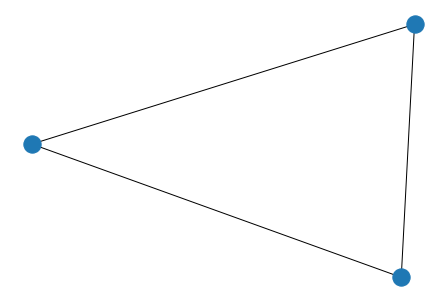

In [22]:
#use G=nx.Graph() for undirected graph
G_1=nx.Graph()
G_1.add_nodes_from([1,2,3])
G_1.add_edges_from([(1,2),(1,3),(2,3),(2,1)])

nx.draw(G_1)

Notice that this creates a plot with three vertices and even though we defined an edge between (1,2) and (2,1), there is only one edge between them on the plot. Let's get its adjacency matrix.

In [23]:
#get adjacency matrix
A_1=nx.adjacency_matrix(G_1)

#A_matrix in np.array type
A_1.A

array([[0, 1, 1],
       [1, 0, 1],
       [1, 1, 0]], dtype=int32)

All entries in this adjacency matrix are ones because we didn't define weights between edges. Each edge can carry a different weight. This is recorded in the corresponding adjacency matrix, as well. Note that, to get the matrix with the correct weights, we have to use nx.DiGraph() below. If we use nx.Graph(), it will give us a symmetric matrix instead.

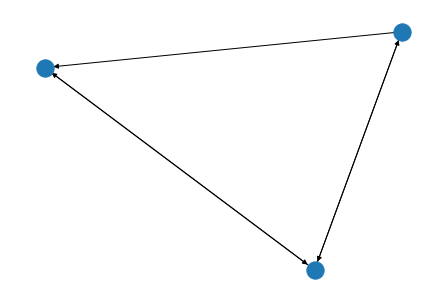

In [26]:
G_2=nx.DiGraph()
G_2.add_nodes_from([1,2,3])
G_2.add_weighted_edges_from([(1,2,0.32),(1,3,0.24),(2,3,0.32),(2,1,0.4),(3,1,0.65)])

nx.draw(G_2)

In [27]:
#get adjacency matrix
A_2=nx.adjacency_matrix(G_2)

#A_matrix in np.array type
A_2.A

array([[0.  , 0.32, 0.24],
       [0.4 , 0.  , 0.32],
       [0.65, 0.  , 0.  ]])

Let's find eigenvalues and eigenvectors of G_2. This means, we will find eigenvalues and eigenvectors of the corresponding adjacency matrix A_2.

In [28]:
la.eig(A_2.A)

(array([ 0.62490918+0.j       , -0.31245459+0.0942529j,
        -0.31245459-0.0942529j]),
 array([[-0.53782061+0.j        , -0.40102365+0.12097003j,
         -0.40102365-0.12097003j],
        [-0.63071718+0.j        , -0.26975062-0.23623526j,
         -0.26975062+0.23623526j],
        [-0.55941472+0.j        ,  0.83425043+0.j        ,
          0.83425043-0.j        ]]))

Let's complete this tutorial by collecting all these info in a function. Here, input is the graph and output is a list of eigenvalue-eigenvector pairs.

In [29]:
def eigenpairs_graph(G):
    A_sparse=nx.adjacency_matrix(G)  #sparse matrix, we have to turn it into numpy array
    A=A_sparse.A
    lst=[]
    size=len(A)
    first=la.eig(A)[0]
    second=la.eig(A)[1]
    for i in range(0,size):
        eigenvalue=first[i]
        eigenvector=np.transpose(second)[i]
        lst.append((eigenvalue,eigenvector))
    return lst


In [30]:
eigenpairs_graph(G_2)

[((0.6249091758793016+0j),
  array([-0.53782061+0.j, -0.63071718+0.j, -0.55941472+0.j])),
 ((-0.3124545879396507+0.09425289689771377j),
  array([-0.40102365+0.12097003j, -0.26975062-0.23623526j,
          0.83425043+0.j        ])),
 ((-0.3124545879396507-0.09425289689771377j),
  array([-0.40102365-0.12097003j, -0.26975062+0.23623526j,
          0.83425043-0.j        ]))]